In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pycountry

## *About Dataset*  
## The world is becoming more modernized every year, and with this, more polluted too.

This data was pulled from the US Energy Administration and joined together for an easier analysis. Its a collection of some big factors that play into C02 Emissions, with everything from the Production and Consumption of each type of major energy source for each country and its pollution rating each year. It also includes each countries GDP, Population, Energy intensity per capita (person), and Energy intensity per GDP (per person GDP). All the data spans all the way from the 1980's to 2020.

*Feature Descriptions:*  
* Country - Country in question  
* Energy_type - Type of energy source  
* Year - Year the data was recorded  
* Energy_consumption - Amount of Consumption for the specific energy source, measured (quad Btu)  
* Energy_production - Amount of Production for the specific energy source, measured (quad Btu)  
* GDP - Countries GDP at purchasing power parities, measured (Billion 2015$ PPP)  
* Population - Population of specific Country, measured (Mperson)  
* Energyintensityper_capita - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy     per   unit of capita (capita = individual person), measured (MMBtu/person)  
* Energyintensityby_GDP- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit   of GDP, measred (1000 Btu/2015$ GDP PPP)  
* CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)  

In [4]:
#windows:
#df = pd.read_csv(r"C:\Users\ferna\OneDrive\Documentos\MIS_COSAS_DE_THE_BRIDGE\EDA\proyecto_co2\src\data\energy.csv",delimiter=",")
#df.head()

In [5]:
#Mac:
df = pd.read_csv("/Users/fersaol/Library/CloudStorage/OneDrive-Personal/Documentos/MIS_COSAS_DE_THE_BRIDGE/EDA/proyecto_co2/src/data/energy.csv",delimiter=",")
df.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [6]:
df.tail()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.6204,14654.2,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.6204,14654.2,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.6204,14654.2,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.6204,14654.2,11.508701,4.482962,0.000000
55439,55439,Zimbabwe,renewables_n_other,2019,0.068089,0.067499,37.6204,14654.2,11.508701,4.482962,0.000000


In [7]:
df.sample(10)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
41627,41627,Antigua and Barbuda,renewables_n_other,2010,0.000002,0.000002,1.63039,88.03,109.980431,5.938197,0.000000
11836,11836,Madagascar,nuclear,1988,NaN,NaN,20.02560,10952.40,2.057228,1.125139,0.000000
46429,46429,Laos,coal,2013,0.017694,0.022803,36.02270,6541.30,24.676923,4.481040,0.951554
37927,37927,Greece,coal,2007,0.359885,0.345597,393.18990,11051.57,136.671334,3.841484,33.582140
54092,54092,Antarctica,natural_gas,2019,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
34506,34506,Trinidad and Tobago,all_energy_types,2004,0.582307,1.324855,28.10920,1290.11,NaN,NaN,32.960887
19615,19615,Cameroon,coal,1994,0.000000,0.000000,31.36700,13231.00,5.623035,2.371868,0.000000
13244,13244,Mali,natural_gas,1989,0.000000,0.000000,10.25370,8296.92,1.002696,0.811345,0.000000
38657,38657,Togo,renewables_n_other,2007,0.002747,0.000993,8.79417,5920.36,3.313154,2.230463,0.000000
36904,36904,Netherlands,nuclear,2006,0.031816,0.031816,793.16400,16349.08,262.149729,5.403557,0.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


Eliminamos la columna de Unnamed: 0 porque no nos aporta ningún valor, lo único que tiene es el indice y por tanto estaría repetido

In [9]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [10]:
df.describe()

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


## **PUNTOS A TRATAR**
1. El año vemos que hay que parsearlo a una variable de tipo datetime
2. Desde la columna energy_consumption hay valores nulos tenemos que identificarlos y ver si se eliminan o si se sustituyen por algo
3. vemos que el mínimo de Energy_sonsumption es negativo, ver si tiene sentido, y que el 25% de los datos se acumulan hasta el 0 ¿tiene sentido esto también?
4. En energy pdroduction pasa lo mismo que en Energy_consumption, sin embargo para los percentiles 50 y 75 puede tener sentido que el país tenga una producción negativa si 
estos no producen la suficiente energía y tienen que importarla del exterior y que su saldo sea negativo. En ese caso, la variable sería un saldo neto y creo que no es el caso, corroborarlo.
5. El máximo de GDP es muy elevado, corroborar que no se trata de un outlier, hacer lo mismo para el mínimo. Comprobación de outliers.
6. Posibles outliers también en intensity per capita y por GDP, comprobar los outliers de manera general
7. Las emisiones de co2 vemos que la mínima es negativa, tiene esto sentido? y el 50% de los valores se acumulan hasta 0 también, tiene sentido?. Sin embargo el máximo es muy elevado lo que nos da una desviación típica muy elevada también, tiene sentido?


In [11]:
#1. El año vemos que hay que parsearlo a una variable de tipo datetime
df.Year = pd.to_datetime(df.Year,format="%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Country                      55440 non-null  object        
 1   Energy_type                  55440 non-null  object        
 2   Year                         55440 non-null  datetime64[ns]
 3   Energy_consumption           44287 non-null  float64       
 4   Energy_production            44289 non-null  float64       
 5   GDP                          40026 non-null  float64       
 6   Population                   46014 non-null  float64       
 7   Energy_intensity_per_capita  50358 non-null  float64       
 8   Energy_intensity_by_GDP      50358 non-null  float64       
 9   CO2_emission                 51614 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 4.2+ MB


In [12]:
#Ahora organizamos los datos por fechas:
df = df.sort_values(by="Year")
df.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,World,all_energy_types,1980-01-01,292.89979,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.62713
928,Northern Mariana Islands,nuclear,1980-01-01,NaN,NaN,NaN,1.663300e+01,0.000000,0.000,0.00000
927,Northern Mariana Islands,petroleum_n_other_liquids,1980-01-01,0.00000,0.000000,NaN,1.663300e+01,0.000000,0.000,NaN
926,Northern Mariana Islands,natural_gas,1980-01-01,0.00000,0.000000,NaN,1.663300e+01,0.000000,0.000,NaN
925,Northern Mariana Islands,coal,1980-01-01,0.00000,0.000000,NaN,1.663300e+01,0.000000,0.000,NaN


In [13]:
# vemos que porcentaje de nulos tenemos en las columnas donde teníamos:
nulos =df.isnull().sum()/len(df)
nulos

Country                        0.000000
Energy_type                    0.000000
Year                           0.000000
Energy_consumption             0.201172
Energy_production              0.201136
GDP                            0.278030
Population                     0.170022
Energy_intensity_per_capita    0.091667
Energy_intensity_by_GDP        0.091667
CO2_emission                   0.069012
dtype: float64

In [14]:
#Los vamos revisando. Empezamos por Energy_consumption:
df[df.Energy_consumption.isnull()]

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
928,Northern Mariana Islands,nuclear,1980-01-01,NaN,NaN,NaN,16.633,0.000000,0.000000,0.0
923,North Macedonia,renewables_n_other,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0
922,North Macedonia,nuclear,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0
921,North Macedonia,petroleum_n_other_liquids,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,North Macedonia,natural_gas,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
54486,Former Yugoslavia,all_energy_types,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54526,Georgia,nuclear,2019-01-01,NaN,NaN,53.4418,3995.690,63.302975,4.732982,0.0
54520,"Gambia, The",nuclear,2019-01-01,NaN,NaN,5.2609,2349.080,3.544654,1.582748,0.0
54508,French Polynesia,nuclear,2019-01-01,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0


In [15]:
df.loc[df.Energy_consumption.isnull(),"Country"].unique()

array(['Northern Mariana Islands', 'North Macedonia', 'North Korea',
       'Palestinian Territories', 'Oman', 'Norway', 'Niue',
       'New Caledonia', 'Netherlands Antilles', 'New Zealand', 'Nigeria',
       'Nicaragua', 'Niger', 'Reunion', 'Qatar', 'Puerto Rico', 'Romania',
       'Saint Helena', 'Rwanda', 'Russia', 'Paraguay', 'Papua New Guinea',
       'Panama', 'Peru', 'Portugal', 'Poland', 'Philippines', 'Malawi',
       'Madagascar', 'Macau', 'Mali', 'Maldives', 'Malaysia',
       'Luxembourg', 'Lesotho', 'Lebanon', 'Latvia', 'Malta', 'Lithuania',
       'Libya', 'Liberia', 'Morocco', 'Montserrat', 'Montenegro',
       'Mozambique', 'Namibia', 'Nepal', 'Nauru', 'Mauritius',
       'Martinique', 'Mauritania', 'Mongolia', 'Moldova', 'Mexico',
       'Laos', 'Saint Kitts and Nevis', 'Turks and Caicos Islands',
       'Turkmenistan', 'U.S. Virgin Islands', 'U.S. Pacific Islands',
       'Turkey', 'Timor-Leste', 'The Bahamas', 'Togo', 'Tunisia', 'Tonga',
       'Trinidad and Tobago'

In [16]:
len(df.loc[df.Energy_consumption.isnull(),"Country"].unique()) # tenemos nulos en prácticamente todos los países

211

Vemos que la mayoría de los datos que faltan en Energy_consumption vienen de países muy pequeños los cuales es posible o que en esa época no proporcionaran datos por diferentes motivos, no estar adheridos al sistema de recolección, por ser países en desarrollo, estar en guerra etc. También hay países desarrollados en la lista pero en mucha menor medida y que puede ser debido a algún tipo de error que no estén. Vemos en qué años se ha producido esto:

In [17]:
df.loc[df.Energy_consumption.isnull(),"Year"].unique() # y tenemos nulos en prácticamente todos los años también

array(['1980-01-01T00:00:00.000000000', '1981-01-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1984-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1986-01-01T00:00:00.000000000', '1987-01-01T00:00:00.000000000',
       '1988-01-01T00:00:00.000000000', '1989-01-01T00:00:00.000000000',
       '1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01

In [18]:
df.loc[df.Energy_consumption.isnull(),"Year"].value_counts()
#vemos que los nulos están repartidos de manera bastante igualitaria por años, y por países

1980-01-01    364
1981-01-01    363
1988-01-01    362
1991-01-01    362
1989-01-01    362
1983-01-01    362
1982-01-01    362
1985-01-01    361
1987-01-01    361
1984-01-01    361
1986-01-01    356
1990-01-01    356
1992-01-01    268
1993-01-01    262
1994-01-01    257
1995-01-01    257
1996-01-01    255
2002-01-01    251
2001-01-01    251
2000-01-01    251
1999-01-01    250
1998-01-01    250
1997-01-01    250
2003-01-01    246
2004-01-01    246
2005-01-01    246
2006-01-01    241
2007-01-01    241
2010-01-01    237
2009-01-01    236
2008-01-01    236
2011-01-01    236
2019-01-01    235
2018-01-01    233
2012-01-01    231
2013-01-01    231
2014-01-01    231
2015-01-01    231
2016-01-01    231
2017-01-01    231
Name: Year, dtype: int64

In [19]:
df.loc[df.Energy_consumption.isnull(),"Country"].value_counts()

Hawaiian Trade Zone    205
South Sudan            200
Kosovo                 180
Germany, East          174
Germany, West          174
                      ... 
Mexico                  10
South Africa             4
Tuvalu                   3
Brazil                   2
Micronesia               2
Name: Country, Length: 211, dtype: int64

In [20]:
# VEMOS CUÁLES SON LOS 20 PAÍSES CON MAYORES NULOS EN LA VARIABLE ENERGY CONSUMPTION:
consumo20largest = df.loc[df.Energy_consumption.isnull(),"Country"].value_counts().nlargest(20)
consumo20largest

Hawaiian Trade Zone             205
South Sudan                     200
Kosovo                          180
Germany, East                   174
Germany, West                   174
Montenegro                      170
Former Serbia and Montenegro    170
Serbia                          170
Former Yugoslavia               169
Former U.S.S.R.                 168
Former Czechoslovakia           162
Timor-Leste                     155
Palestinian Territories         125
Eritrea                         110
Moldova                         100
Belarus                         100
Turkmenistan                    100
Latvia                          100
Bosnia and Herzegovina          100
Uzbekistan                      100
Name: Country, dtype: int64

In [21]:
# VEMOS CUÁLES SON LOS 20 PAÍSES QUE TIENEN MENOS NULOS EN LA VARIABLE ENERGY CONSUMPTION:
df.loc[df.Energy_consumption.isnull(),"Country"].value_counts().nsmallest(20)

Brazil                  2
Micronesia              2
Tuvalu                  3
South Africa            4
Mexico                 10
China                  12
Romania                16
Iran                   31
Italy                  32
Kiribati               40
American Samoa         40
Costa Rica             40
Brunei                 40
Greece                 40
Greenland              40
Antigua and Barbuda    40
Ghana                  40
Austria                40
Eswatini               40
Egypt                  40
Name: Country, dtype: int64

In [22]:
len(df[df.Energy_consumption.isnull()]) # vemos el total de nulos en la variable energy consumption

11153

Aunque tenemos nulos en todos los países y años prácticamente, vemos que la idea que teníamos al principio no anda muy desaccertada, siendo países que en la actualidad ya no existen, como la división de Alemania en Este y Oeste o la propia URS o países que se encuentran en vías de desarrollo en su mayoría dentro de los 20 países con mayor número de nulos y dada la cantidad elevada de datos que tenemos decidimos **eliminar los nulos que se encuentran en esta columna**. Por años vamos a eliminar una proporción bastante homogénea por otra parte

In [23]:
# Revisamos Energy Production:
df[df.Energy_production.isnull()]

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
928,Northern Mariana Islands,nuclear,1980-01-01,NaN,NaN,NaN,16.633,0.000000,0.000000,0.0
923,North Macedonia,renewables_n_other,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0
922,North Macedonia,nuclear,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0
921,North Macedonia,petroleum_n_other_liquids,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,North Macedonia,natural_gas,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
54486,Former Yugoslavia,all_energy_types,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54526,Georgia,nuclear,2019-01-01,NaN,NaN,53.4418,3995.690,63.302975,4.732982,0.0
54520,"Gambia, The",nuclear,2019-01-01,NaN,NaN,5.2609,2349.080,3.544654,1.582748,0.0
54508,French Polynesia,nuclear,2019-01-01,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0


In [24]:
len(df[df.Energy_production.isnull()])
# vemos que el número es muy parecido al de Energy_consumpion por lo que es altamente probable que coincidan en fila ambos

11151

In [25]:
df.loc[df.Energy_production.isnull(),"Year"].value_counts() # se reparten por años de manera muy parecida a Energy_consumption

1980-01-01    364
1981-01-01    363
1988-01-01    362
1991-01-01    362
1989-01-01    362
1983-01-01    362
1982-01-01    362
1985-01-01    361
1987-01-01    361
1984-01-01    361
1986-01-01    356
1990-01-01    356
1992-01-01    268
1993-01-01    262
1994-01-01    257
1995-01-01    257
1996-01-01    255
2002-01-01    251
2001-01-01    251
2000-01-01    251
1999-01-01    250
1998-01-01    250
1997-01-01    250
2003-01-01    246
2004-01-01    246
2005-01-01    246
2006-01-01    241
2007-01-01    241
2010-01-01    237
2009-01-01    236
2008-01-01    236
2011-01-01    236
2018-01-01    233
2019-01-01    233
2012-01-01    231
2013-01-01    231
2014-01-01    231
2015-01-01    231
2016-01-01    231
2017-01-01    231
Name: Year, dtype: int64

In [26]:
df.loc[df.Energy_production.isnull(),"Country"].value_counts() # vemos los países con nulos en energy production

Hawaiian Trade Zone    205
South Sudan            200
Kosovo                 180
Germany, East          174
Germany, West          174
                      ... 
Mexico                  10
South Africa             4
Brazil                   2
Micronesia               2
Tuvalu                   2
Name: Country, Length: 211, dtype: int64

In [27]:
produccion20largest = df.loc[df.Energy_production.isnull(),"Country"].value_counts().nlargest(20) # vemos los 20 países con más nulos en energy production
produccion20largest

Hawaiian Trade Zone             205
South Sudan                     200
Kosovo                          180
Germany, East                   174
Germany, West                   174
Montenegro                      170
Former Serbia and Montenegro    170
Serbia                          170
Former Yugoslavia               169
Former U.S.S.R.                 168
Former Czechoslovakia           162
Timor-Leste                     155
Palestinian Territories         125
Eritrea                         110
Bosnia and Herzegovina          100
Latvia                          100
Croatia                         100
Azerbaijan                      100
Tajikistan                      100
Kyrgyzstan                      100
Name: Country, dtype: int64

In [28]:
# comprobamos si son exactamente iguales los países que tienen nulos en las variables energy production y energy consumption
df.loc[df.Energy_production.isnull(),"Country"].value_counts().nlargest(20).equals(df.loc[df.Energy_consumption.isnull(),"Country"].value_counts().nsmallest(20))

False

In [29]:
pd.concat([produccion20largest,consumo20largest],axis=1) # aquí vemos que son muy parecidos, aunque no iguales pues no coinciden algunos al final del dataframe

,Country,Country
Hawaiian Trade Zone,205.0,205.0
South Sudan,200.0,200.0
Kosovo,180.0,180.0
"Germany, East",174.0,174.0
"Germany, West",174.0,174.0
Montenegro,170.0,170.0
Former Serbia and Montenegro,170.0,170.0
Serbia,170.0,170.0
Former Yugoslavia,169.0,169.0
Former U.S.S.R.,168.0,168.0


Como con Energy Consumption decidimos eliminar los nulos para Energy Production

In [30]:
df = df.dropna(subset=["Energy_production","Energy_consumption"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44287 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Country                      44287 non-null  object        
 1   Energy_type                  44287 non-null  object        
 2   Year                         44287 non-null  datetime64[ns]
 3   Energy_consumption           44287 non-null  float64       
 4   Energy_production            44287 non-null  float64       
 5   GDP                          34486 non-null  float64       
 6   Population                   39487 non-null  float64       
 7   Energy_intensity_per_capita  43287 non-null  float64       
 8   Energy_intensity_by_GDP      43287 non-null  float64       
 9   CO2_emission                 43023 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.7+ MB


Con GDP, Population, Energy_intensity_per_capita, Energy_intensity_by_GDP y CO2_emission podemos rellenarlos con algún método que decidamos ya que son variables las cuales podemos asumir el dato y no representan una proporción grande de los datos. En este sentido el GDP se consideraría que en los años que no ha habido dato el pib se mantuvo constante. Con la población podríamos asumir el mismo criterio, en los años que no había dato la pobalción se mantuvo constante. De este modo, par estas dos variables vamos a usar el siguiente método:  
* GDP: backfill  
* Population: backfill  
Los índices de intensidad per capita tienen aún menos nulos en relación al total de datos y puesto que son un cociente que incluye a las anteriores variables creo que se debería adoptar el mismo método para mantener la homogeneidad:
* Energy_intensity_per_capita: backfill  
* Energy_intensity_by_GDP: backfill  
Por último, en relación a las emisiones de CO2 me parece, dadas las decisiones tomadas con anterioridad, y por los mismos motivos, aplicar el mismo método. Pues al no tener datos estamos asumiendo que se mantuvieron constantes los datos del periodo anterior al null y creo que es un buen método en este caso:
* CO2_emission: backfill  

In [31]:
df = df.fillna(method="backfill")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44287 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Country                      44287 non-null  object        
 1   Energy_type                  44287 non-null  object        
 2   Year                         44287 non-null  datetime64[ns]
 3   Energy_consumption           44287 non-null  float64       
 4   Energy_production            44287 non-null  float64       
 5   GDP                          44287 non-null  float64       
 6   Population                   44287 non-null  float64       
 7   Energy_intensity_per_capita  44287 non-null  float64       
 8   Energy_intensity_by_GDP      44287 non-null  float64       
 9   CO2_emission                 44287 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.7+ MB


In [32]:
len(df)

44287

3. vemos que el mínimo de Energy_sonsumption es negativo, ver si tiene sentido, y que el 25% de los datos se acumulan hasta el 0 ¿tiene sentido esto también?

In [33]:
# Lo primero que haremos es pedir un describe, después de los cambios que le hemos hecho al dataframe y ver que nos muestra ahora
df.describe()

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,44287.000000,4.428700e+04,44287.000000,4.428700e+04,44287.000000,44287.000000,44287.000000
mean,1.537811,1.532769e+00,885.760460,6.574994e+04,73.949587,3.745977,91.979942
std,15.456596,1.530390e+01,5875.759792,4.646721e+05,113.105986,4.541091,973.506807
min,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,0.000000,0.000000e+00,11.217900,1.378525e+03,4.093402,0.980474,0.000000
50%,0.018381,5.121971e-04,68.439300,6.712590e+03,31.392971,3.083064,0.129713
75%,0.209422,1.125513e-01,308.756700,2.237907e+04,101.283892,5.034920,7.531295
max,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


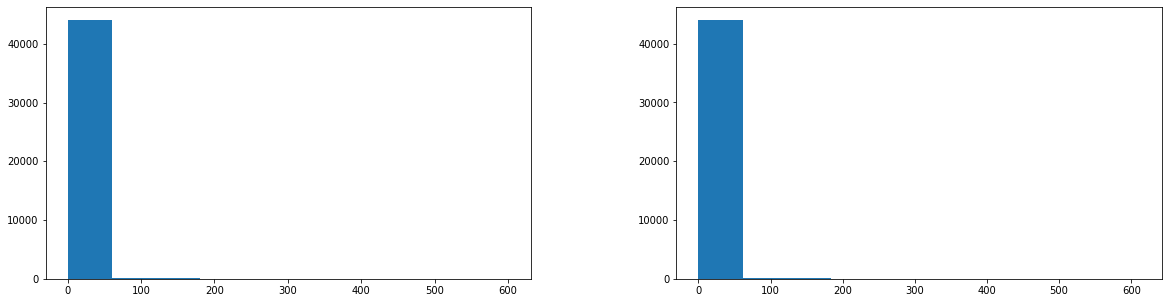

In [34]:
columnas = ["Energy_consumption","Energy_production"]

fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(1,2,i+1)
    plt.hist(df[pos])


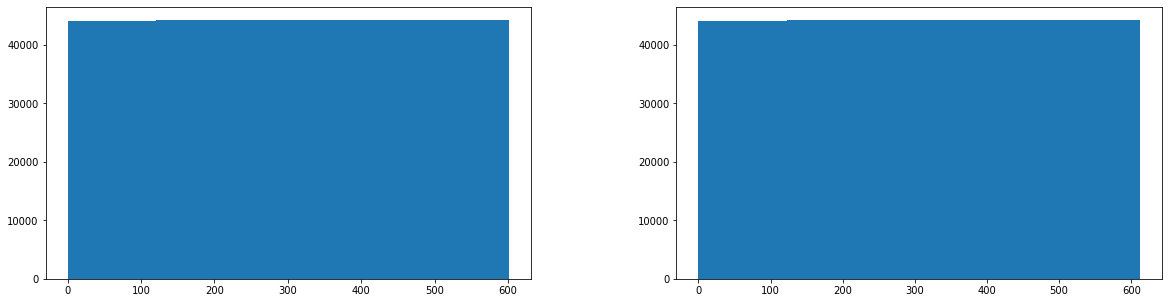

In [35]:
columnas = ["Energy_consumption","Energy_production"]

fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(1,2,i+1)
    plt.hist(df[pos],cumulative=True)

vamos a representarlos todos, menos la fecha:

In [37]:
# reorganizamos las columnas:
df = df[["Year","Country","GDP","Population","Energy_production","Energy_consumption","Energy_type","CO2_emission","Energy_intensity_per_capita","Energy_intensity_by_GDP"]]
df.head()

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000
926,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,natural_gas,0.00000,0.000000,0.000
925,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,coal,0.00000,0.000000,0.000
924,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,all_energy_types,0.00000,0.000000,0.000


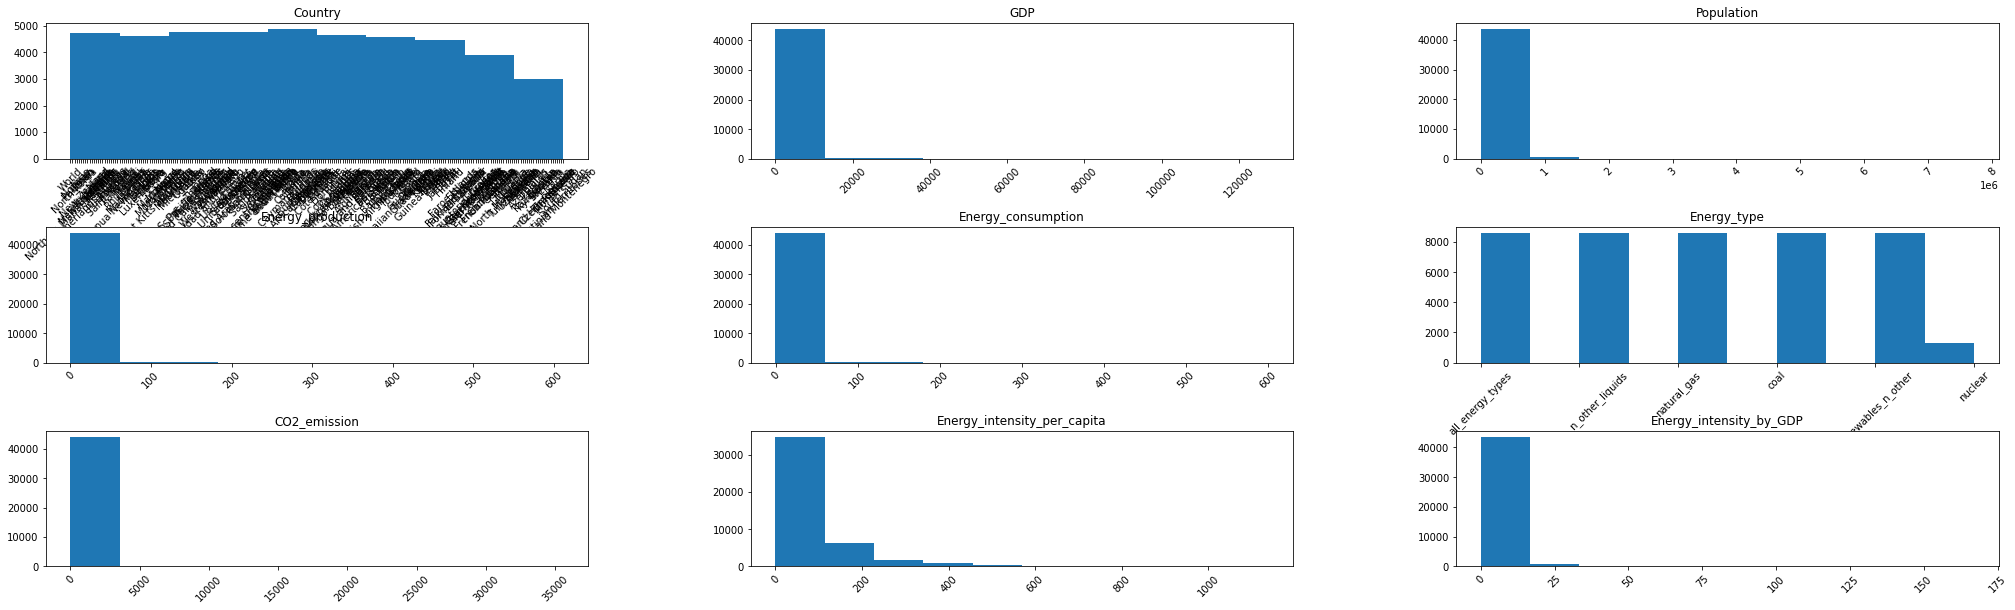

In [38]:
columnas = df.columns[1:]

fig = plt.figure(figsize=(35,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(3,3,i+1)
    plt.hist(df[pos])
    plt.title(pos)
    plt.xticks(rotation=45)

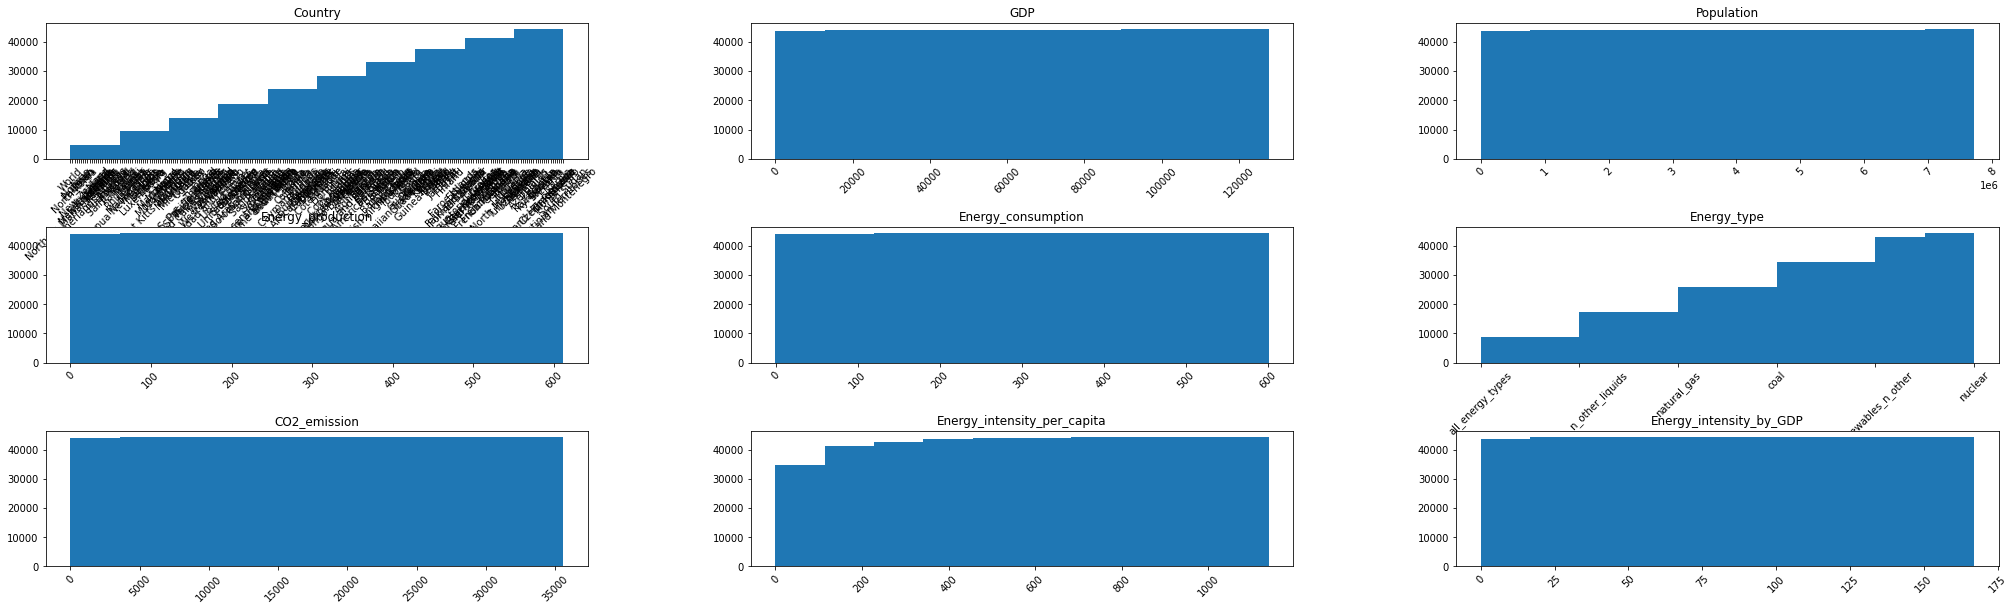

In [39]:
# Vemos el acumulado:
columnas = df.columns[1:]

fig = plt.figure(figsize=(35,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(3,3,i+1)
    plt.hist(df[pos],cumulative=True)
    plt.title(pos)
    plt.xticks(rotation=45)

In [40]:
# Miramos el dataframe sin la suma del mundo que se incluye en Country:
df_noworld = df[df.Country != "World"]
df_noworld.head()

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
927,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.000000,0.000000,petroleum_n_other_liquids,0.0,0.00000,0.0
926,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.000000,0.000000,natural_gas,0.0,0.00000,0.0
925,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.000000,0.000000,coal,0.0,0.00000,0.0
924,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.000000,0.000000,all_energy_types,0.0,0.00000,0.0
917,1980-01-01,North Korea,133.0802,17472.100,0.109012,0.109854,renewables_n_other,0.0,57.90728,0.0


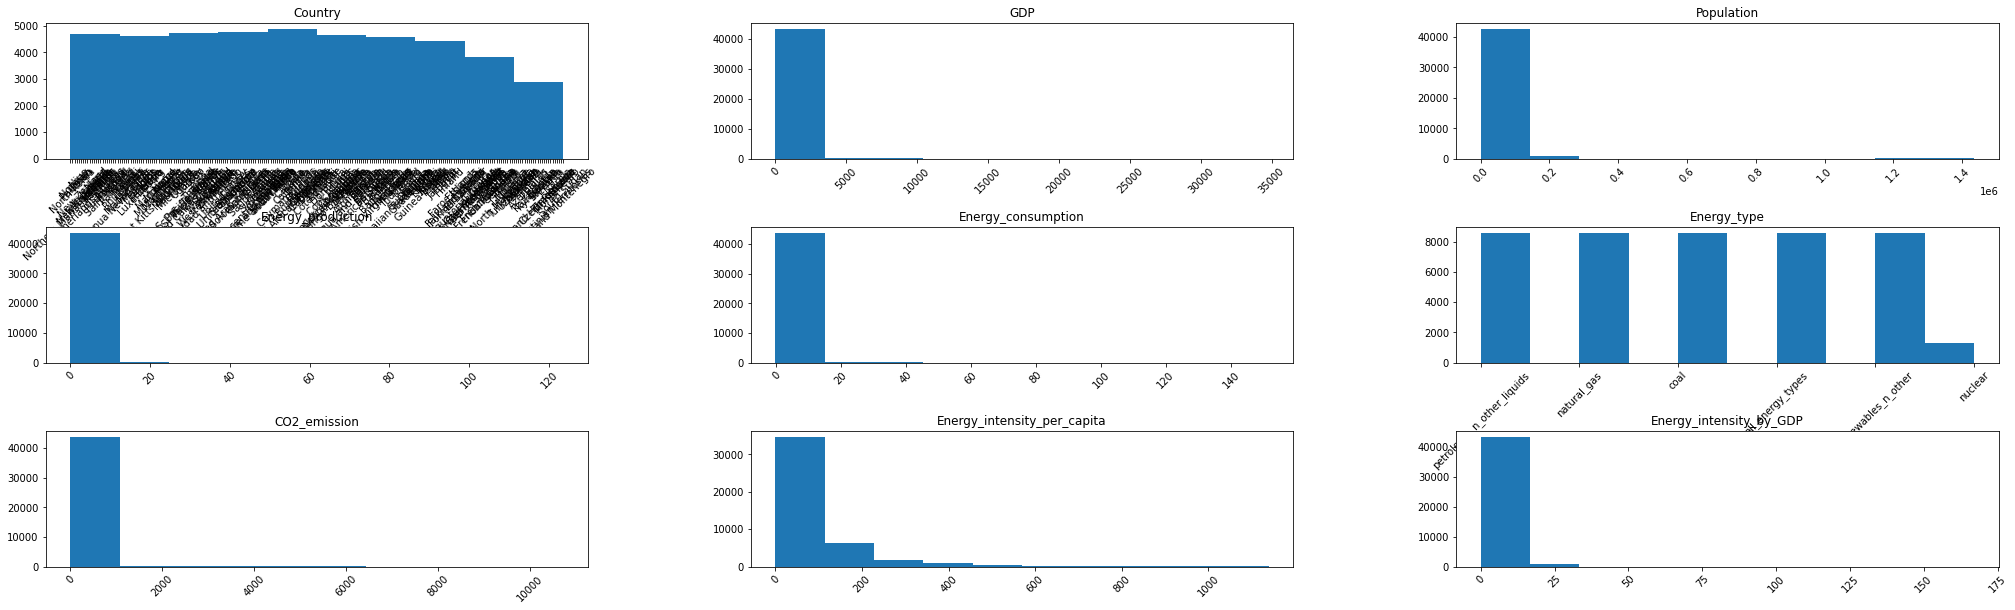

In [41]:
columnas = df_noworld.columns[1:]

fig = plt.figure(figsize=(35,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(3,3,i+1)
    plt.hist(df_noworld[pos])
    plt.title(pos)
    plt.xticks(rotation=45)

In [95]:
df_noworld_yc = df_noworld.groupby(["Country","Year"]).mean()
df_noworld_yc.head()

GDP  Population  Energy_production  \
Country     Year                                                      
Afghanistan 1980-01-01  22216.835768     13356.5           0.029024   
            1981-01-01  22932.779117     13171.7           0.037089   
            1982-01-01  23041.543671     12882.5           0.038027   
            1983-01-01  23694.203177     12537.7           0.039885   
            1984-01-01  24877.949877     12204.3           0.039931   

                        Energy_consumption  CO2_emission  \
Country     Year                                           
Afghanistan 1980-01-01            0.010633      0.000000   
            1981-01-01            0.011980      0.530386   
            1982-01-01            0.012759      0.603851   
            1983-01-01            0.015609      0.663842   
            1984-01-01            0.015681      0.823842   

                        Energy_intensity_per_capita  Energy_intensity_by_GDP  
Country     Year                                                              
Afghanistan 1980-01-01                     1.990283                      0.0  
            1981-01-01                     2.273773                      0.0  
            1982-01-01                     2.476058                      0.0  
            1983-01-01                     3.112357                      0.0  
            1984-01-01                     3.212166                      0.0

Haciendo zoom y mirando solo por país aislado vemos que tampoco siguen un distribución parecida a la normal:

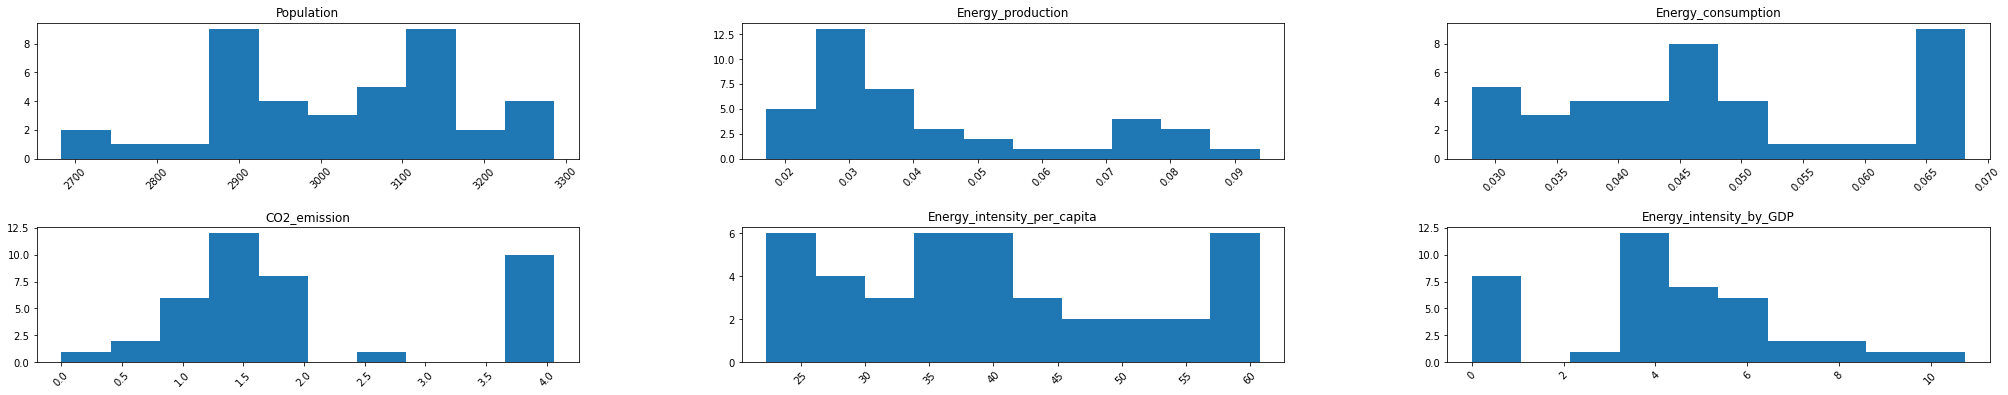

In [100]:
# Miramos Albania:
albania = df_noworld_yc.loc["Albania"]
columnas = albania.columns[1:]

fig = plt.figure(figsize=(35,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(3,3,i+1)
    plt.hist(albania[pos])
    plt.title(pos)
    plt.xticks(rotation=45)

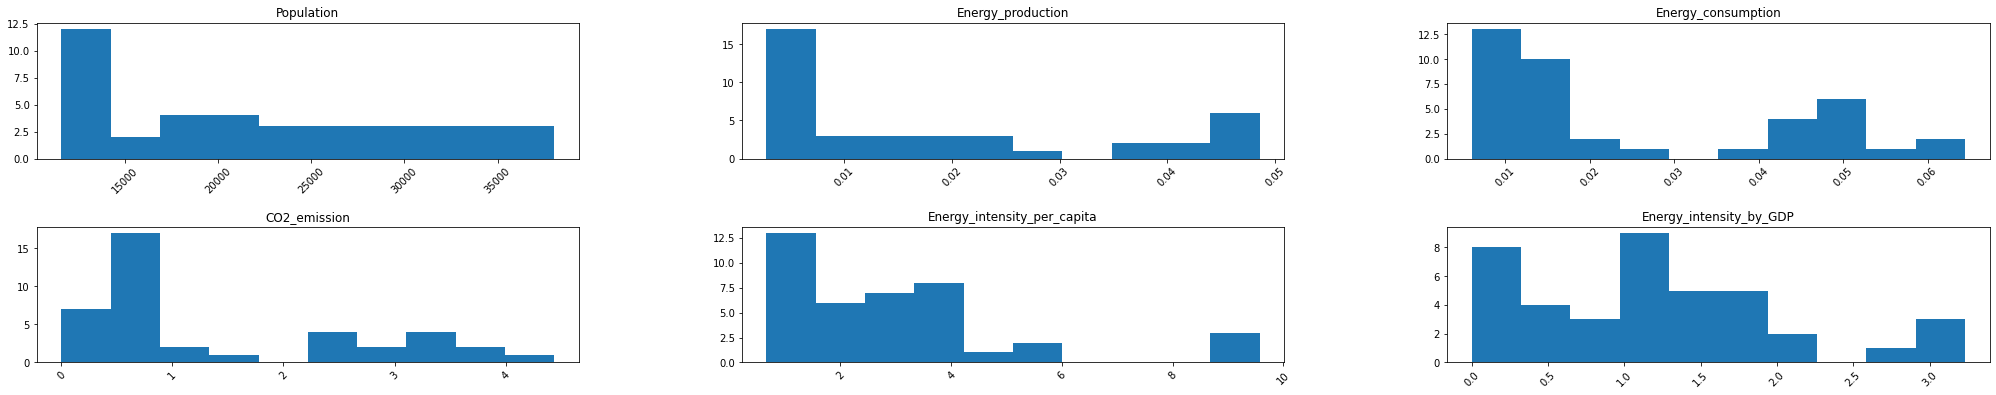

In [101]:
# Miramos Afganisthan:
afganistan = df_noworld_yc.loc["Afghanistan"]
columnas = afganistan.columns[1:]

fig = plt.figure(figsize=(35,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(3,3,i+1)
    plt.hist(afganistan[pos])
    plt.title(pos)
    plt.xticks(rotation=45)

De momento lo que puedo ver en los histogramas es que aunque el número de datos referentes a cada uno de los países se distribuye de una manera más o menos uniforme, las variables no lo hacen de tal manera. Por ejemplo, El pib, la población, el consumo y producción de energía, las emisiones de c02 no se reparten de manera uniforme, sino que se concentran cerca del cero. Por otra parte los tipos de energía usados si que se distribuyen de manera uniforme.
Vemos también que eliminar los datos agregados del mundo no cambia la foto de los datos por países individuales.
Vamos a ver como se ven los datos agrupados por países, en media:

In [42]:
df_paises = df_noworld.groupby(by="Country").mean()
df_paises

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
Country,,,,,,,
Afghanistan,4964.180642,21958.99000,0.018674,0.025176,1.394636,2.988530,1.170854
Albania,6180.107289,3025.92475,0.042661,0.047828,2.050176,39.857921,4.136949
Algeria,1530.211487,30729.13500,2.253114,0.596916,32.204434,47.734061,3.850075
American Samoa,93.135358,51.42240,0.000000,0.002863,0.199587,143.199056,5.056482
Angola,93.176689,17585.18725,0.847328,0.066189,3.569511,8.524104,1.256040
...,...,...,...,...,...,...,...
Wake Island,375.404160,77477.24750,0.000000,0.007523,0.498613,0.000000,0.000000
Western Sahara,184.820815,35327.50650,0.000000,0.001297,0.093201,0.000000,0.000000
Yemen,118.222787,17488.28575,0.192070,0.078041,5.200322,11.680348,2.126761


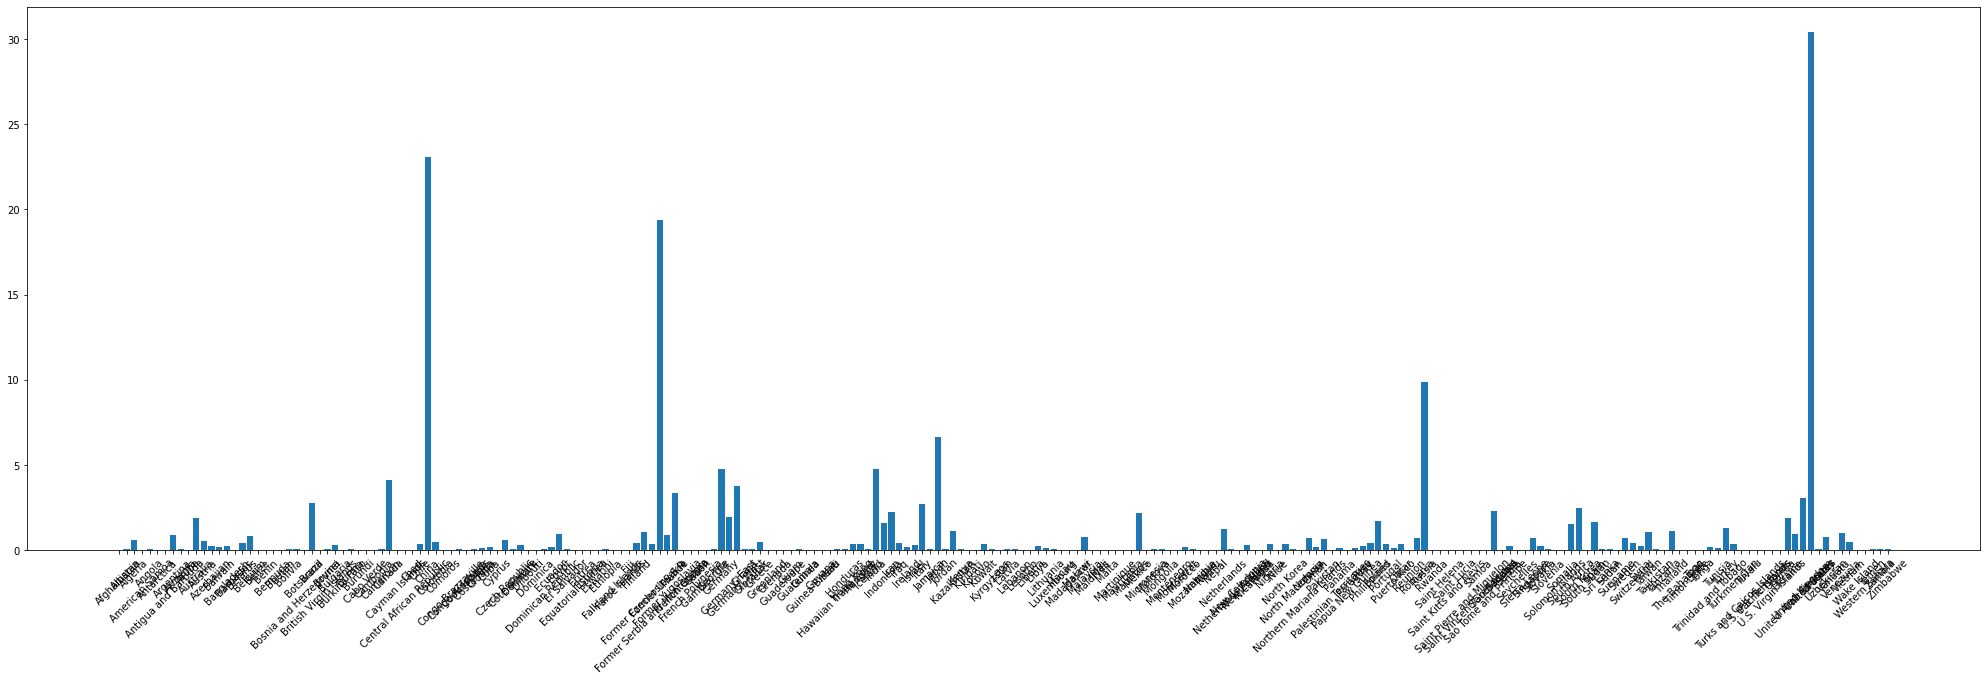

In [43]:
fig = plt.figure(figsize=(35,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.bar(df_paises.index,df_paises["Energy_consumption"])
plt.xticks(rotation=45)
plt.show()

In [44]:
df_paises.Energy_consumption.nlargest(15)
# aquí podemos corroborar la distribución que veíamos en el histograma, donde tres países claramente acaparan el consumo de energia y por tanto pasará lo mismo con las emisiones
# de co2 y con la producción y el resto de países se concentran entorno al 0 y el 9,86. De esta manera, que el 25 por ciento se vieran acumulados hata el 0 tiene sentido.

Country
United States      30.382893
China              23.081227
Former U.S.S.R.    19.385618
Russia              9.869659
Japan               6.656833
India               4.753698
Germany             4.750536
Canada              4.116225
Germany, West       3.760118
France              3.361891
United Kingdom      3.057773
Brazil              2.748230
Italy               2.696702
South Korea         2.454175
Saudi Arabia        2.300381
Name: Energy_consumption, dtype: float64

In [45]:
np.percentile(df.Energy_consumption,50) # el 50% de los datos se acumulan hasta un consumo de 0.018 pues hay muchos países que consumen eso o menos

0.0183810282699999

In [46]:
df.Energy_consumption.min()

-0.1634377312889085

Vamos a ver los números negativos que tenemos:

In [47]:
menos_cero = df[df.Energy_consumption < 0]
menos_cero

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
989,1980-01-01,Poland,217.9600,35614.330,0.028203,-0.021921,renewables_n_other,0.0,133.739458,0.000000
1109,1980-01-01,Singapore,52.6156,2434.335,0.000000,-0.000202,renewables_n_other,0.0,184.300685,8.526931
323,1980-01-01,Denmark,151.3587,5123.270,0.000426,-0.000512,renewables_n_other,0.0,167.104336,5.656237
581,1980-01-01,Hong Kong,84.5737,4881.245,0.000000,-0.000895,renewables_n_other,0.0,54.300545,3.134003
629,1980-01-01,Israel,2642.6270,3700.920,0.000000,-0.000563,renewables_n_other,0.0,96.054360,0.000000
...,...,...,...,...,...,...,...,...,...,...
52547,2017-01-01,Turkmenistan,101.4620,5757.670,0.000028,-0.010891,renewables_n_other,0.0,301.821510,17.127483
51911,2017-01-01,Israel,324.0460,8243.850,0.015583,-0.003692,renewables_n_other,0.0,126.695617,3.223183
53933,2018-01-01,Turkmenistan,107.7050,5848.840,0.000027,-0.010891,renewables_n_other,0.0,297.501690,16.155608
53297,2018-01-01,Israel,337.3700,8381.080,0.015998,-0.004007,renewables_n_other,0.0,118.001262,2.931434


In [48]:
menos_cero.Energy_type.unique()

array(['renewables_n_other'], dtype=object)

Vemos que todos los consumos negativos de Energía se deben al tipo de generación renovable, y tiene sentido, puesto que al ser renovables no consumen energía para la producción de esta sino que la aportan al sistema y de ahí que los datos sean negativos. En este sentido, mantenemos los datos negativos en el dataframe

4. En energy pdroduction pasa lo mismo que en Energy_consumption, sin embargo para los percentiles 50 y 75 puede tener sentido que el país tenga una producción negativa si 
estos no producen la suficiente energía y tienen que importarla del exterior y que su saldo sea negativo. En ese caso, la variable sería un saldo neto y creo que no es el caso, corroborarlo.

In [49]:
menos_cero_prod = df[df.Energy_production < 0]
menos_cero_prod

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
6551,1984-01-01,Qatar,314.3004,341.272,-1.000000e-39,0.0,renewables_n_other,0.0,777.570352,0.000000
13481,1989-01-01,Qatar,25.1873,461.688,-1.000000e-39,0.0,renewables_n_other,0.0,602.136898,11.037284
16253,1991-01-01,Qatar,25.6149,487.354,-1.000000e-39,0.0,renewables_n_other,0.0,688.579064,13.101037
19025,1993-01-01,Qatar,28.1389,501.479,-1.000000e-39,0.0,renewables_n_other,0.0,1110.320147,19.787633
21797,1995-01-01,Qatar,29.2230,513.447,-1.000000e-39,0.0,renewables_n_other,0.0,1095.358362,19.245405
39815,2008-01-01,Qatar,128.8180,1436.670,-1.000000e-39,0.0,renewables_n_other,0.0,794.540420,8.861280


Vemos que los valores negativos correspondientes a la producción de energía corresponden todos a Qatar y comprendidos en el periodo de 1984 a 1995. Podemos apreciar que no tenía consumo y que la producción se puede considerar también cero. Es decir, Qatar en estos periodos no produce ni consume energía renovable por lo que vamos a eliminarlos. Esto es debido según hemos podido leer a que Qatar es el mayor exportador de gas del mundo y nunca le ha hecho falta preocuparse por las renovables, así ha empezado a preocuparse por esto en torno al año 2019.

In [50]:
len(menos_cero_prod)

6

Elliminamos los valores negativos

In [51]:
df = df.drop(menos_cero_prod.index)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44281 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         44281 non-null  datetime64[ns]
 1   Country                      44281 non-null  object        
 2   GDP                          44281 non-null  float64       
 3   Population                   44281 non-null  float64       
 4   Energy_production            44281 non-null  float64       
 5   Energy_consumption           44281 non-null  float64       
 6   Energy_type                  44281 non-null  object        
 7   CO2_emission                 44281 non-null  float64       
 8   Energy_intensity_per_capita  44281 non-null  float64       
 9   Energy_intensity_by_GDP      44281 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.7+ MB


In [53]:
df.describe()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
count,44281.000000,4.428100e+04,44281.000000,44281.000000,44281.000000,44281.000000,44281.000000
mean,885.868029,6.575876e+04,1.532977,1.538019,91.992405,73.845145,3.744858
std,5876.150467,4.647029e+05,15.304925,15.457633,973.572171,112.734780,4.539711
min,0.124958,1.147100e+01,0.000000,-0.163438,-0.005130,0.000000,0.000000
25%,11.185900,1.379240e+03,0.000000,0.000000,0.000000,4.093402,0.980474
50%,68.439300,6.714280e+03,0.000512,0.018406,0.131050,31.385452,3.083064
75%,308.756700,2.237907e+04,0.112577,0.209513,7.532122,101.259447,5.033796
max,127690.247059,7.714631e+06,611.508969,601.040490,35584.933498,1139.320598,166.913605


5. El máximo de GDP es muy elevado, corroborar que no se trata de un outlier, hacer lo mismo para el mínimo. Comprobación de outliers.
6. Posibles outliers también en intensity per capita y por GDP, comprobar los outliers de manera general
Vamos a ver los outliers para todos en general

In [54]:
df_continuas = df.select_dtypes(exclude=["object","datetime64"])
df_continuas.head(2)

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
0,27770.910281,4.298127e+06,296.337228,292.89979,4946.62713,68.145921,10.547
927,133.080200,1.663300e+01,0.000000,0.00000,0.00000,0.000000,0.000


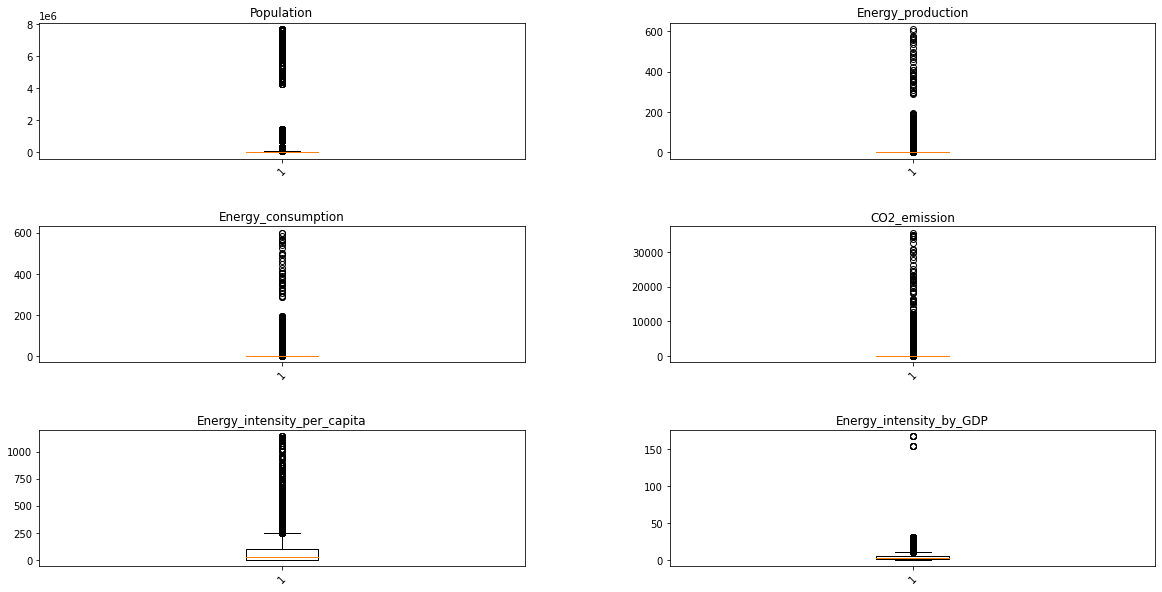

In [55]:
columnas = df_continuas.columns[1:]

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(len(columnas)):
    pos = columnas[i]
    ax = fig.add_subplot(3,2,i+1)
    plt.boxplot(df_continuas[pos])
    plt.title(pos)
    plt.xticks(rotation=45)

Dada la distribución de los datos vista antes en las cuales la mayoría de la producción y consumo de energía así como las emisiones de co2 y la población se concentran en unos pocos países, consideramos normales los boxplot que vemos y no podemos considerar los datos outliers. En Energy_intensity_by_GDP si que podríamos ver que tenemos dos outliers pero que no merece la pena quitarlos.

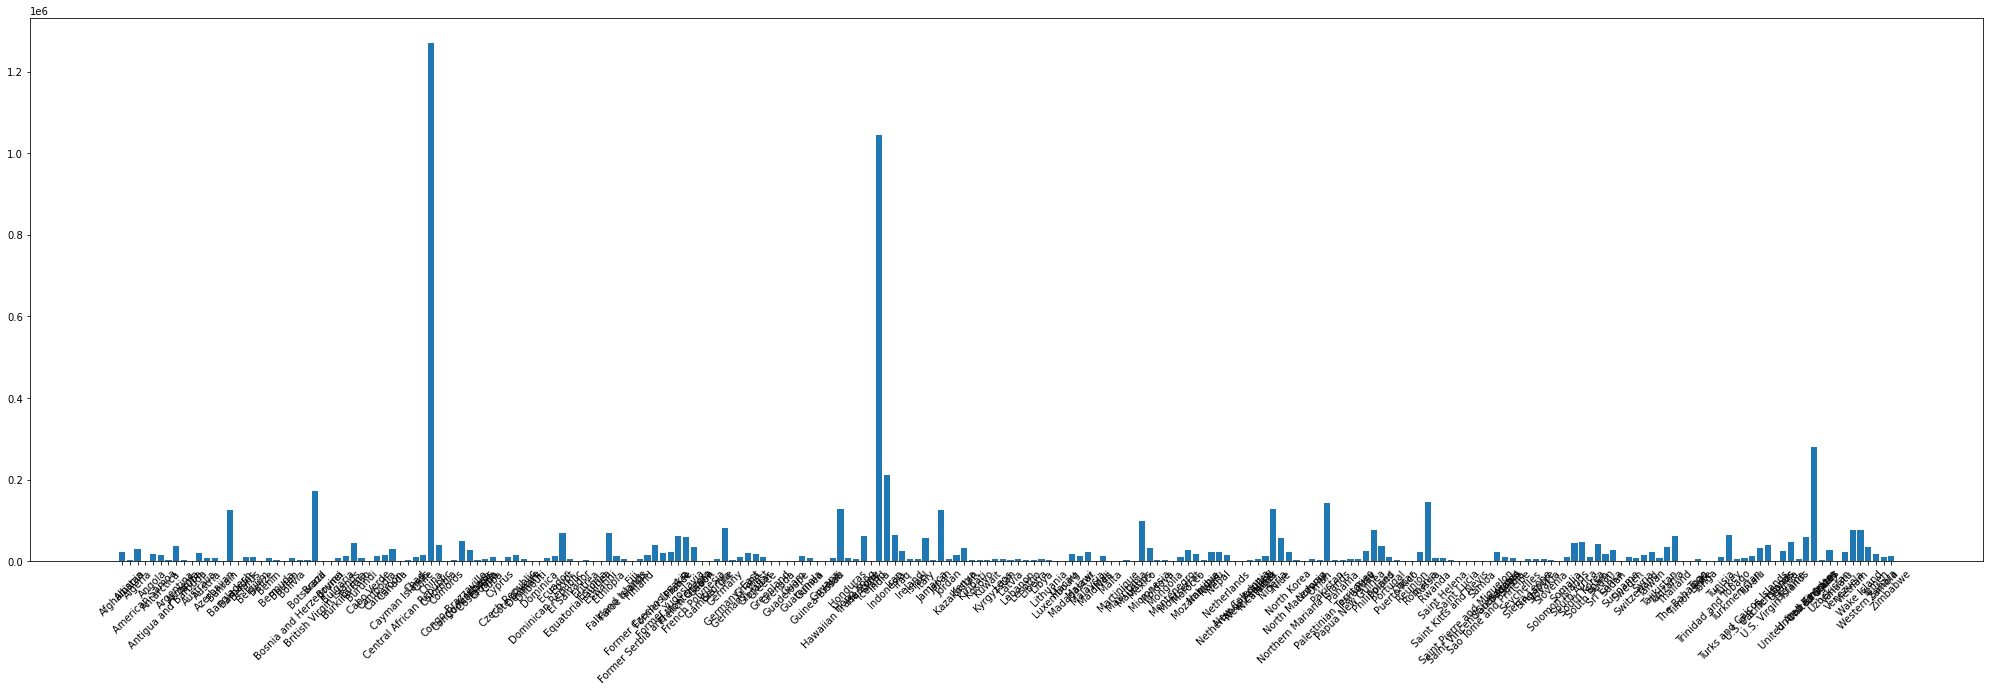

In [56]:
#Veamos la concentración de población:
fig = plt.figure(figsize=(35,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.bar(df_paises.index,df_paises["Population"])
plt.xticks(rotation=45)
plt.show()

Los cinco países con mayor población en el mundo son:

In [57]:
df_paises.Population.nlargest(5)

Country
China            1.268905e+06
India            1.044959e+06
United States    2.789379e+05
Indonesia        2.103265e+05
Brazil           1.713681e+05
Name: Population, dtype: float64

Vemos como la mayoría de la población está concentrada en China, India, Estados Unidos e Indonesia y de ahí ese boxplot, no podemos ponerlos como outliers

7. Las emisiones de co2 vemos que la mínima es negativa, tiene esto sentido? y el 50% de los valores se acumulan hasta 0 también, tiene sentido?. Sin embargo el máximo es muy elevado lo que nos da una desviación típica muy elevada también, tiene sentido?

In [58]:
emisiones_negativas = df[df.CO2_emission < 0]
emisiones_negativas

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
21895,1995-01-01,Singapore,167.3017,3545.325,0.0,0.000021,coal,-0.003077,322.910294,6.842859
24667,1997-01-01,Singapore,194.7608,3812.800,0.0,0.000032,coal,-0.005130,381.140399,7.461523
30211,2001-01-01,Singapore,217.2448,4138.243,0.0,0.000009,coal,-0.000138,422.352619,8.045292


Tenemos tres datos, correspondientes al carbón de Singapore en las cuales se indica que las emisiones de co2 son negativas. Dados los años a los que corresponde y que en esos años no hubo producción de energía, solo consumo, podría interpretarse como que en vez de emitir absorbieron co2 de la atmósfera, lo cual para nosotros no tiene sentido y, dado que son solo 3 datos consideramos que sería bueno eliminarlos del dataframe.

In [59]:
df = df.drop(emisiones_negativas.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44278 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         44278 non-null  datetime64[ns]
 1   Country                      44278 non-null  object        
 2   GDP                          44278 non-null  float64       
 3   Population                   44278 non-null  float64       
 4   Energy_production            44278 non-null  float64       
 5   Energy_consumption           44278 non-null  float64       
 6   Energy_type                  44278 non-null  object        
 7   CO2_emission                 44278 non-null  float64       
 8   Energy_intensity_per_capita  44278 non-null  float64       
 9   Energy_intensity_by_GDP      44278 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.7+ MB


Miramos cuantos datos nos están quedando divididos por tipo de energía y año:

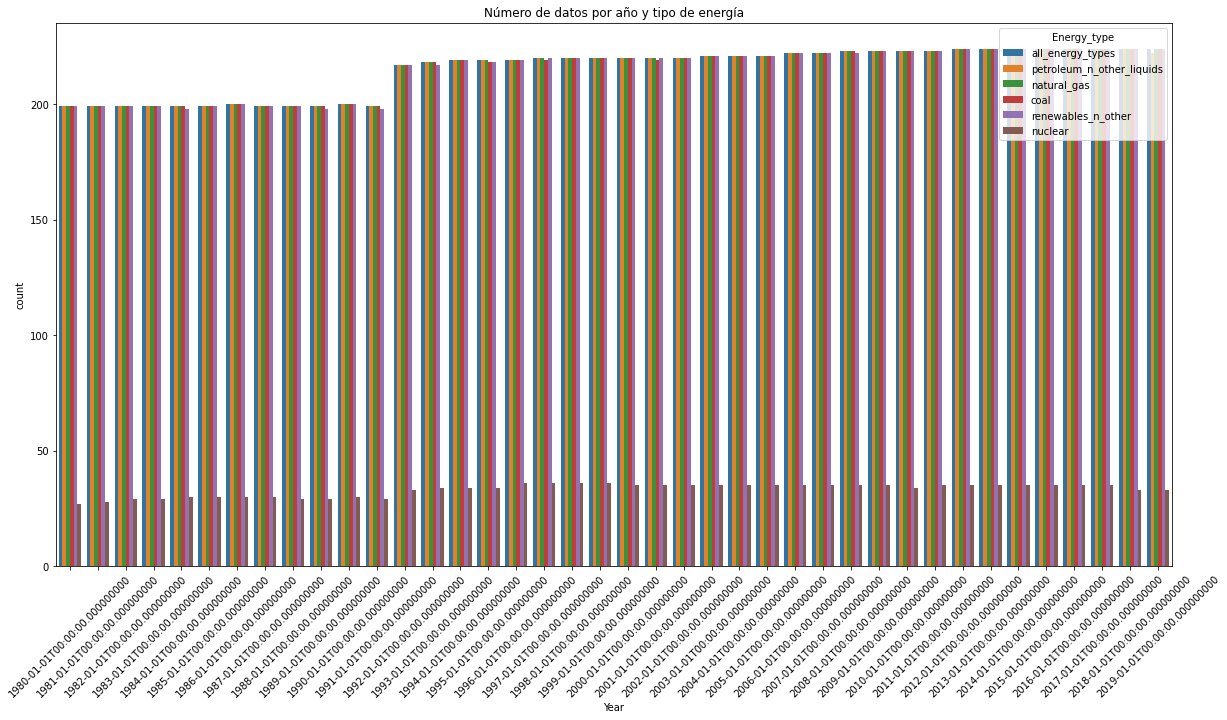

In [60]:
fig = plt.figure(figsize=(20,10))
ax = sns.countplot(data=df,x="Year",hue="Energy_type")
ax.set_xticklabels(df.Year.unique(),rotation=45)
plt.title("Número de datos por año y tipo de energía")
plt.show()

En los datos Rusia está dividida en Rusia y en Former U.S.S.R y Alemania en Germany, Germany East y Germany West? Debería juntarlos en la misma rúbrica al ser lo mismo con nombre diferente?. Creo que sí porque entonces se desvirtúan los datos

In [61]:
reemplazo = {"Former U.S.S.R.":"Russia","Germany, West":"Germany","Germany, East":"Germany"}
df["Country"] = df["Country"].replace(reemplazo)

Vamos a entender un poco lo que tenemos con algunos gráficos:

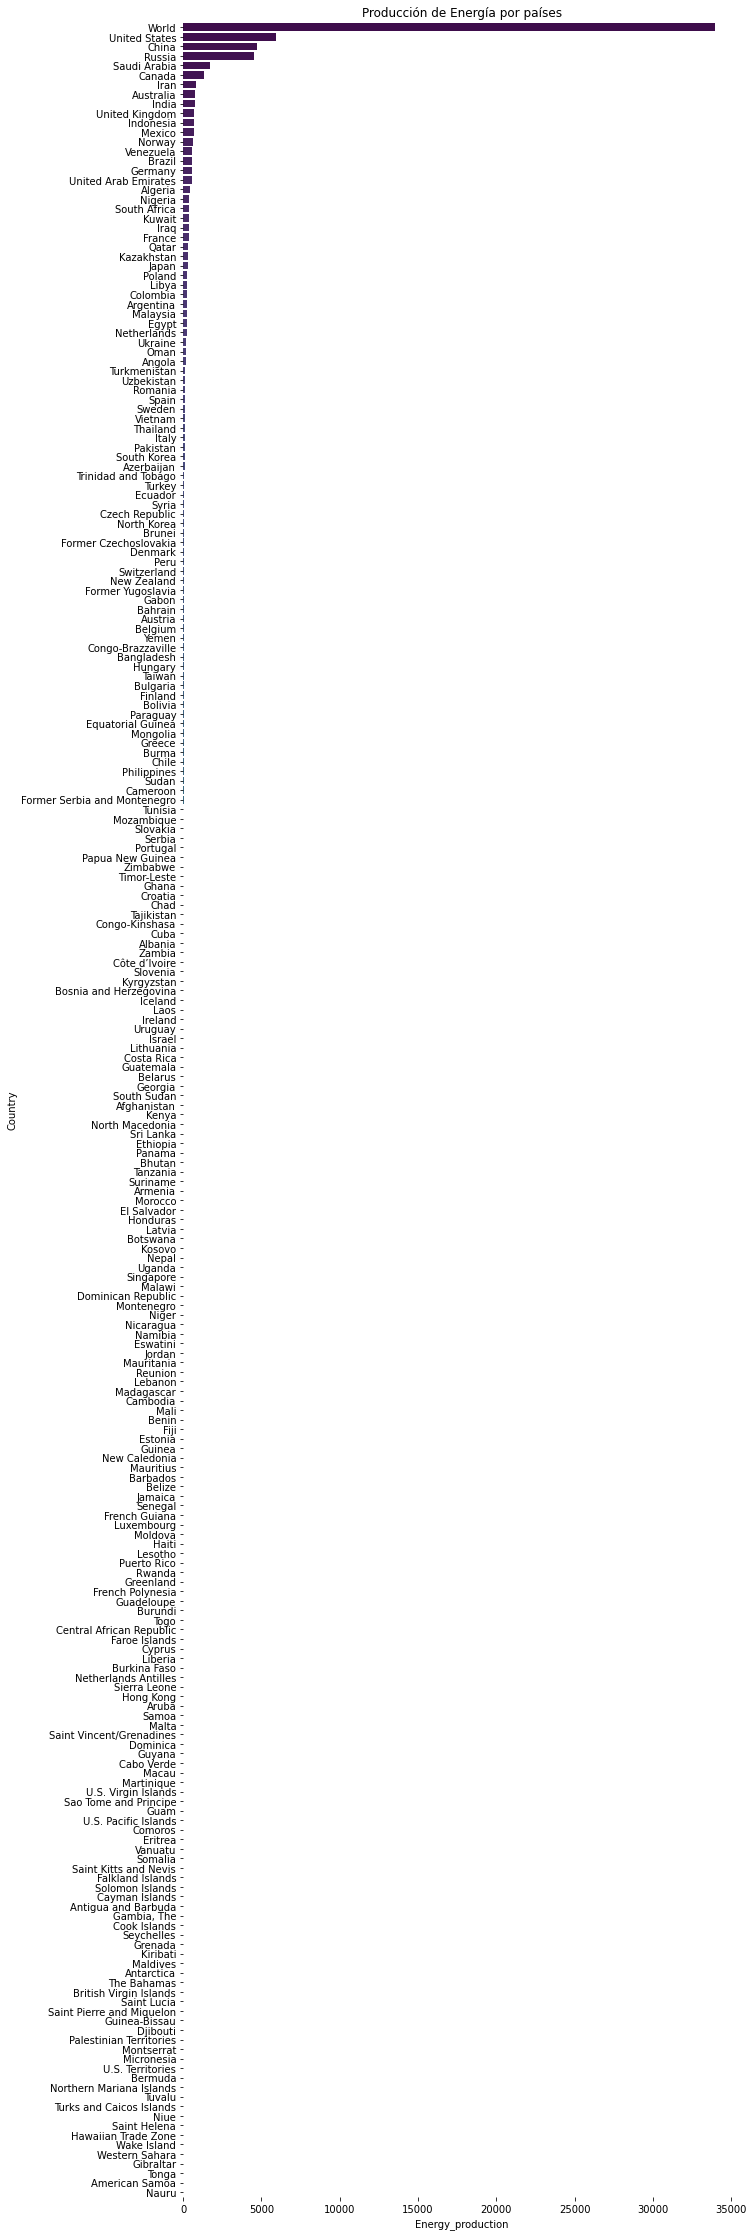

In [62]:
data_sorted = df.copy()
data_sorted = data_sorted.groupby(by="Country").sum().sort_values("Energy_production",ascending=False)
fig = plt.figure(figsize=(10,40))
ax = sns.barplot(data=data_sorted,y=data_sorted.index,x="Energy_production",palette="viridis",orient="h")
sns.despine(left=True, bottom=True)
plt.title("Producción de Energía por países")
plt.show()

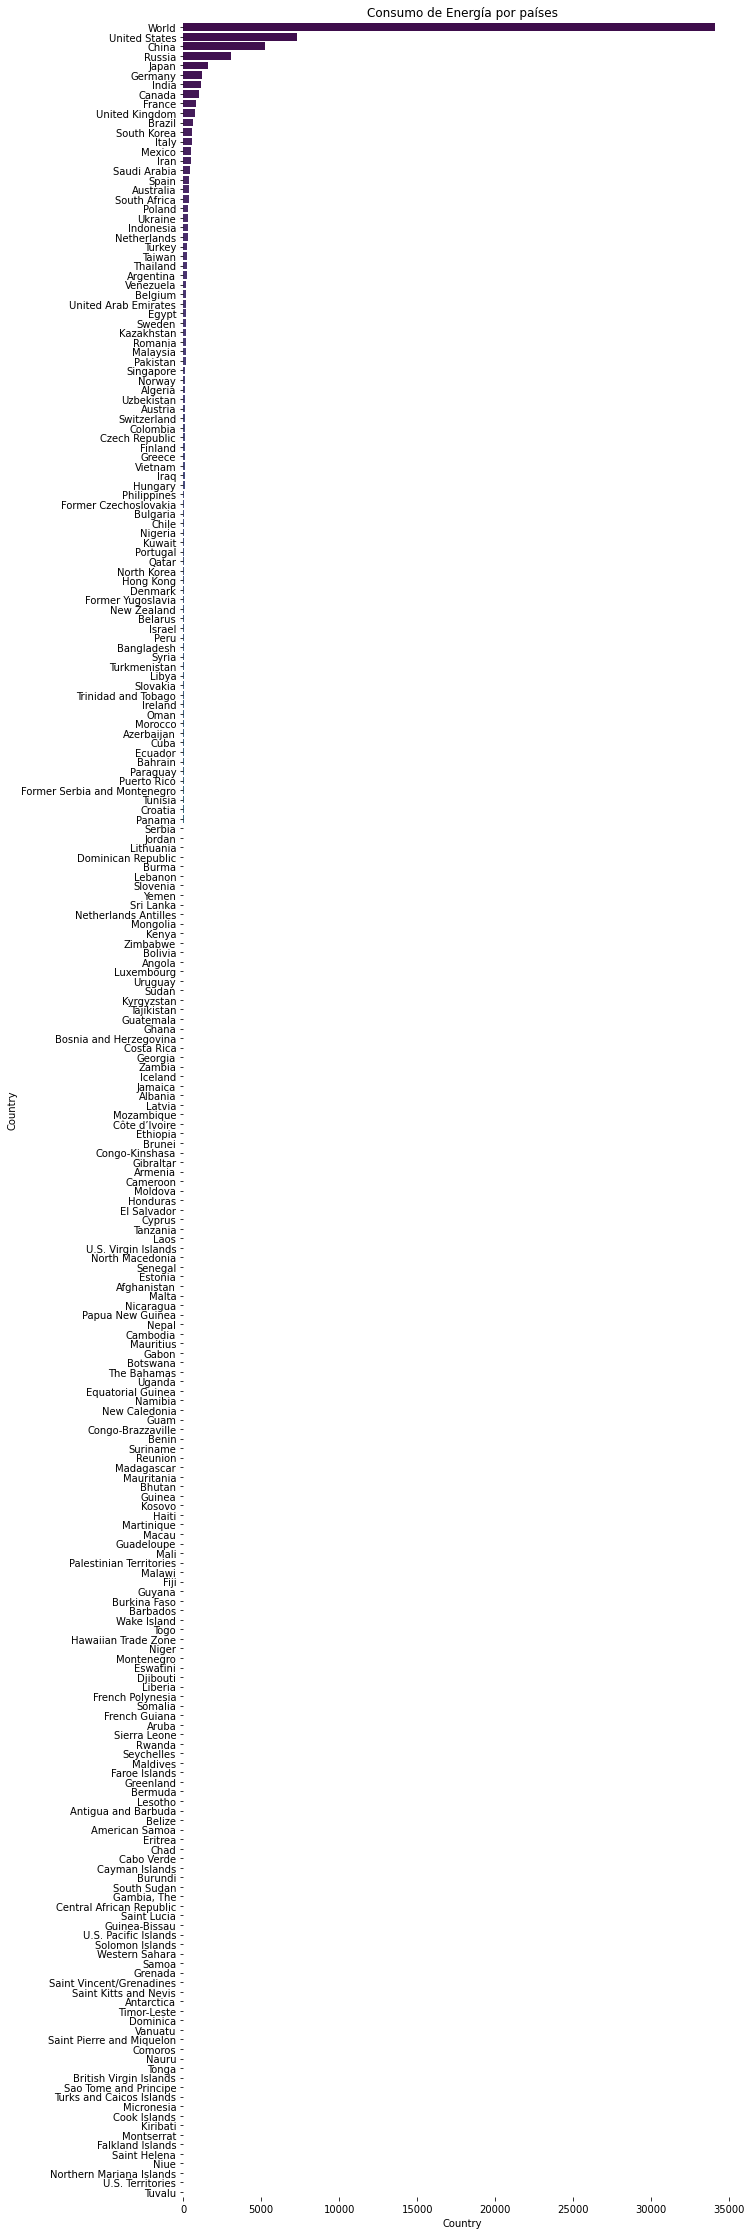

In [63]:
data_sorted_con = df.copy()
data_sorted_con = data_sorted_con.groupby(by="Country").sum().sort_values("Energy_consumption",ascending=False)
fig = plt.figure(figsize=(10,40))
ax = sns.barplot(data=data_sorted_con,y=data_sorted_con.index,x="Energy_consumption",palette="viridis",orient="h")
ax.set_xlabel("Country")
sns.despine(left=True, bottom=True)
plt.title("Consumo de Energía por países")
plt.show()

In [64]:
data_sorted_c02 = df.copy()
data_sorted_c02 = data_sorted_c02.groupby(by="Country").sum().sort_values("CO2_emission",ascending=False)
data_sorted_c02.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
Country,,,,,,,
World,1.666627e+07,1.450639e+09,33940.875411,34052.513363,2.033594e+06,16740.361338,1630.919157
United States,3.150781e+06,6.694509e+07,5909.362722,7291.894297,4.232077e+05,78495.991370,1778.752805
China,1.705215e+06,2.893104e+08,4715.426882,5262.519827,3.955571e+05,11633.859415,2913.528517
Russia,4.739635e+05,2.585325e+07,4531.369991,3053.867313,1.736842e+05,34195.760776,1887.024116
Japan,1.056555e+06,3.020459e+07,275.509043,1597.639846,8.848035e+04,38005.066853,1107.173449


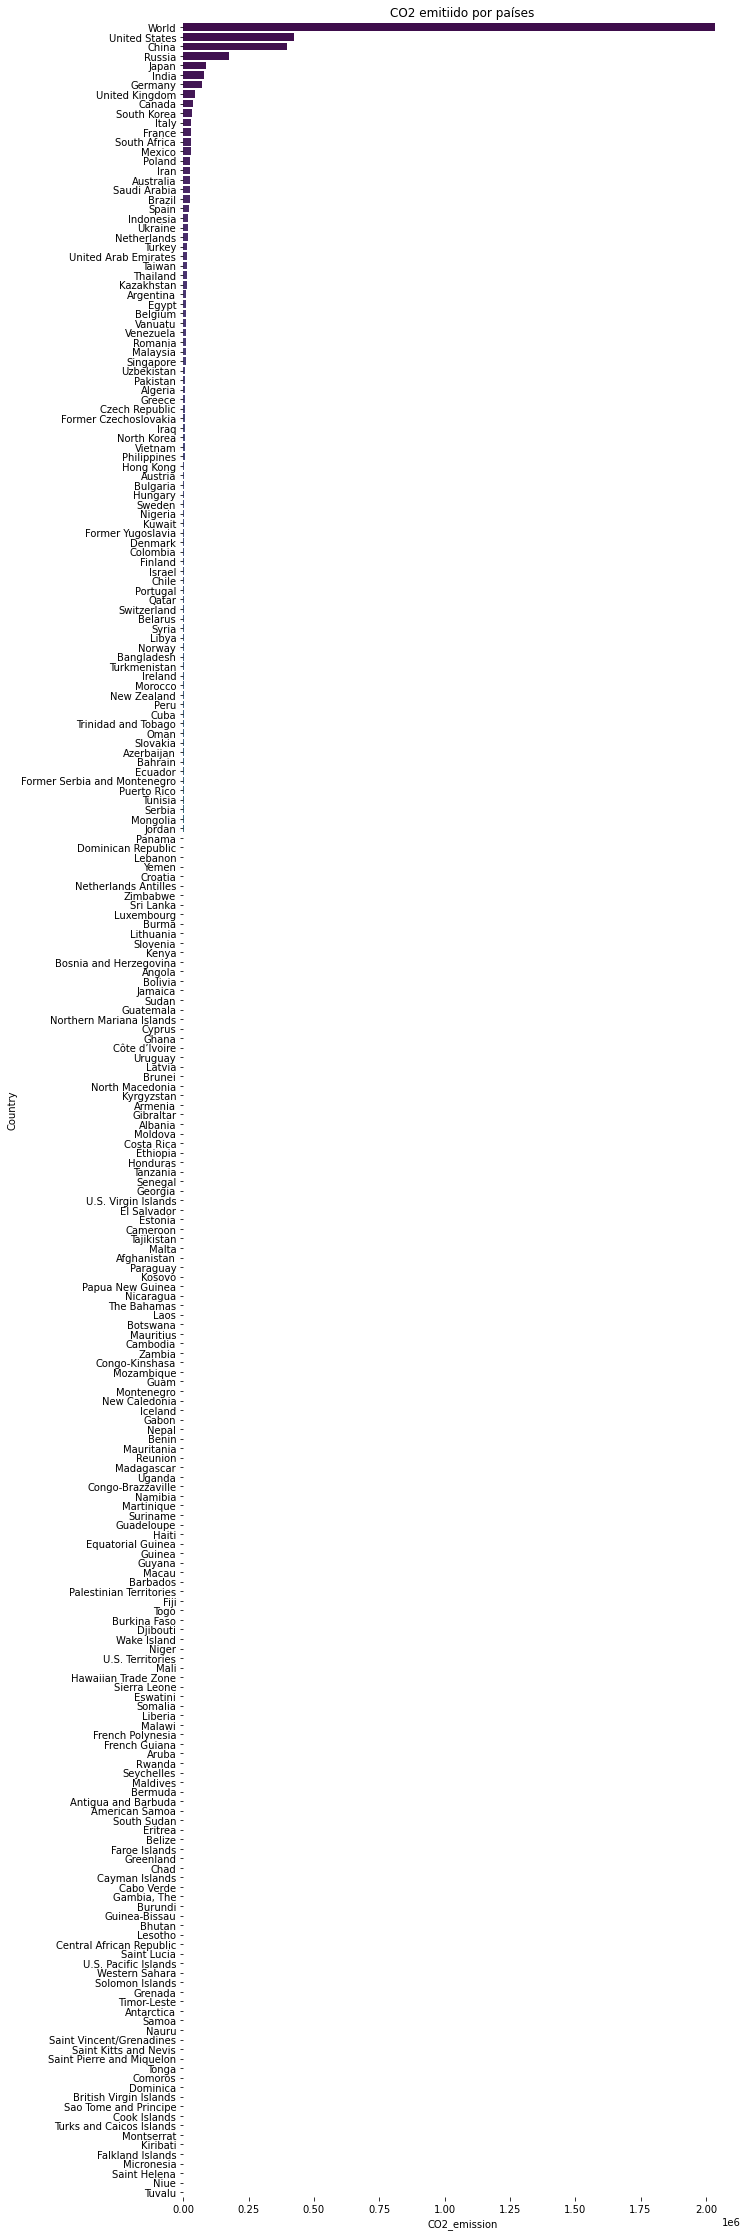

In [65]:
fig = plt.figure(figsize=(10,40))
ax = sns.barplot(data=data_sorted_c02,y=data_sorted_c02.index,x="CO2_emission",palette="viridis",orient="h")
sns.despine(left=True, bottom=True)
plt.title("CO2 emitiido por países")
plt.show()

# Dataframe Limpio

In [66]:
df_co2 = df.copy()
df_co2.head()

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,Energy_intensity_per_capita,Energy_intensity_by_GDP
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000
926,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,natural_gas,0.00000,0.000000,0.000
925,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,coal,0.00000,0.000000,0.000
924,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,all_energy_types,0.00000,0.000000,0.000


In [67]:
# Vamos a renombrar una variable:
df = df.rename(columns={"Energy_intensity_per_capita":"per_capita_production"})
df.head(2)

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000


### VAMOS A CREAR UNA SERIE DE VARIABLES DE LOS DATOS:

Balance = producción energética - el consumo energético: nos dirá si la economía es productora o consumidora neta de energía y por tanto si exporta o importa la misma

In [68]:
df["balance"] = df["Energy_production"] - df["Energy_consumption"]
df.head(2)

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000


In [69]:
df.head(2)

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000


Eficiencia = emisiones de CO2 / producción energética = nos dirá cuanto co2 emite por tonelada de producción energética por tanto nos dirá quién es más socialmente responsable con el medio ambiente o que economía es más limpia.

In [70]:
df["eficiency"] = df["CO2_emission"]/df["Energy_production"]
df.head(2)

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438,16.692561
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000,NaN


Dependencia energética = consumo energético / PIB, nos dirá cuanta energía consume la economía por cada euro de PIB generado y por tanto cuanto depende esta de la energía.

In [71]:
df["energy_dependecy"] = df["Energy_consumption"]/df["GDP"]
df.head(2)

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438,16.692561,0.010547
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000,NaN,0.000000


Intensidad de uso = consumo energético / población, nos dirá la energía que consume cada persona en cada país y por tanto que tanto dependen las personas de esa economía de la energía, lo que redundará también en unas mayores emisiones de co2.

In [72]:
df["use_intensity_pc"] = df["Energy_consumption"]/df["Population"]
df.head(2)

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438,16.692561,0.010547,0.000068
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000,NaN,0.000000,0.000000


co2_pc = emisiones de co2 / población, nos dirá cuanto co2 emite cada una de las personas de la economía

In [73]:
df["co2_pc"] = df["CO2_emission"]/df["Population"]
df.head(2)

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438,16.692561,0.010547,0.000068,0.001151
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000,NaN,0.000000,0.000000,0.000000


Comprobamos de nuevo los nan de nuestro dataframe:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44278 entries, 0 to 55439
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     44278 non-null  datetime64[ns]
 1   Country                  44278 non-null  object        
 2   GDP                      44278 non-null  float64       
 3   Population               44278 non-null  float64       
 4   Energy_production        44278 non-null  float64       
 5   Energy_consumption       44278 non-null  float64       
 6   Energy_type              44278 non-null  object        
 7   CO2_emission             44278 non-null  float64       
 8   per_capita_production    44278 non-null  float64       
 9   Energy_intensity_by_GDP  44278 non-null  float64       
 10  balance                  44278 non-null  float64       
 11  eficiency                32842 non-null  float64       
 12  energy_dependecy         44278 n

Vemos que en la variable eficiency se nos han generado nan. Vamos a ver cuales son:

In [75]:
nuevos_nan = df[df.eficiency.isnull()]
nuevos_nan

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc
927,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.0,0.000000,petroleum_n_other_liquids,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0
926,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.0,0.000000,natural_gas,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0
925,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.0,0.000000,coal,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0
924,1980-01-01,Northern Mariana Islands,133.0802,16.633,0.0,0.000000,all_energy_types,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0
915,1980-01-01,North Korea,133.0802,17472.100,0.0,0.100375,petroleum_n_other_liquids,0.0,57.907280,0.000000,-0.100375,NaN,0.000754,0.000006,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54499,2019-01-01,French Guiana,2918.6180,67266.750,0.0,0.000000,coal,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0
54506,2019-01-01,French Polynesia,2918.6180,67266.750,0.0,0.000000,natural_gas,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0
54517,2019-01-01,"Gambia, The",5.2609,2349.080,0.0,0.000000,coal,0.0,3.544654,1.582748,0.000000,NaN,0.000000,0.000000,0.0
54511,2019-01-01,Gabon,30.7828,2172.090,0.0,0.000000,coal,0.0,26.790571,1.890391,0.000000,NaN,0.000000,0.000000,0.0


In [76]:
len(nuevos_nan[nuevos_nan.Energy_production == 0])

11436

In [77]:
len(nuevos_nan[nuevos_nan.CO2_emission == 0])

11436

Vemos que todos corresponden a países que no tiene producción energética y por tanto no pueden tener emisiones de co2, lo que nos ha dado como resultado los nan. En este caso los vamos a sustituir por el valor 0

In [78]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44278 entries, 0 to 55439
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     44278 non-null  datetime64[ns]
 1   Country                  44278 non-null  object        
 2   GDP                      44278 non-null  float64       
 3   Population               44278 non-null  float64       
 4   Energy_production        44278 non-null  float64       
 5   Energy_consumption       44278 non-null  float64       
 6   Energy_type              44278 non-null  object        
 7   CO2_emission             44278 non-null  float64       
 8   per_capita_production    44278 non-null  float64       
 9   Energy_intensity_by_GDP  44278 non-null  float64       
 10  balance                  44278 non-null  float64       
 11  eficiency                44278 non-null  float64       
 12  energy_dependecy         44278 n

# Dataframe limpio de nuevo:

In [79]:
df.head()

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438,16.692561,0.010547,0.000068,0.001151
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
926,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,natural_gas,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
925,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,coal,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
924,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,all_energy_types,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000


# Dataframe agrupado por países:

In [80]:
df_pais = df.groupby(by="Country").mean()
df_pais.head()

,GDP,Population,Energy_production,Energy_consumption,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc
Country,,,,,,,,,,,,
Afghanistan,4964.180642,21958.99000,0.018674,0.025176,1.394636,2.988530,1.170854,-0.006502,NaN,0.001007,0.000001,0.000064
Albania,6180.107289,3025.92475,0.042661,0.047828,2.050176,39.857921,4.136949,-0.005166,248.504275,0.001655,0.000016,0.000679
Algeria,1530.211487,30729.13500,2.253114,0.596916,32.204434,47.734061,3.850075,1.656198,NaN,0.067458,0.000019,0.001023
American Samoa,93.135358,51.42240,0.000000,0.002863,0.199587,143.199056,5.056482,-0.002863,NaN,0.002806,0.000057,0.003940
Angola,93.176689,17585.18725,0.847328,0.066189,3.569511,8.524104,1.256040,0.781139,10.741348,0.007728,0.000003,0.000184


# Dataframe agrupado por años:

In [81]:
df_anios = df.groupby(by="Year")
df.head()

,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,Energy_intensity_by_GDP,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc
0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.89979,all_energy_types,4946.62713,68.145921,10.547,3.437438,16.692561,0.010547,0.000068,0.001151
927,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,petroleum_n_other_liquids,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
926,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,natural_gas,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
925,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,coal,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
924,1980-01-01,Northern Mariana Islands,133.080200,1.663300e+01,0.000000,0.00000,all_energy_types,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000


Si los agrup suelo tener problemas con la variable eficiencia pues me genera nans por los métodos de agregación

Miramos un poco la situación de España en concreto por curiosidad:

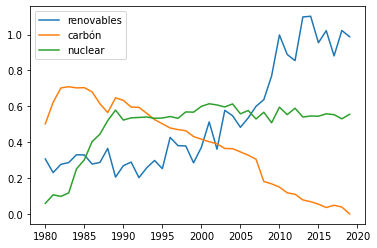

In [82]:
Spain_r = df[(df["Country"] == "Spain") & (df["Energy_type"] == "renewables_n_other")]
Spain_c = df[(df["Country"] == "Spain") & (df["Energy_type"] == "coal")]
Spain_n = df[(df["Country"] == "Spain") & (df["Energy_type"] == "nuclear")]
Spain_r = Spain_r.reset_index()
plt.plot(Spain_r.Year,Spain_r.Energy_production,label="renovables");
plt.plot(Spain_c.Year,Spain_c.Energy_production,label="carbón");
plt.plot(Spain_n.Year,Spain_n.Energy_production,label="nuclear");
plt.legend();

In [83]:
prueba = df.loc[df["Country"]=="Spain",["Energy_production","Energy_type"]].groupby("Energy_type").sum()
prueba.Energy_production

Energy_type
all_energy_types             58.313633
coal                         15.675877
natural_gas                   0.510261
nuclear                      19.639654
petroleum_n_other_liquids     1.343792
renewables_n_other           21.144050
Name: Energy_production, dtype: float64

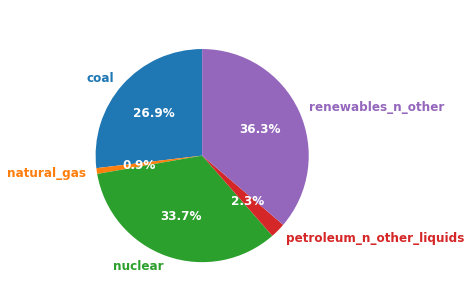

In [84]:
patches, texts, pcts = plt.pie(prueba.Energy_production[1:],labels=prueba.Energy_production.index[1:],autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': None},
       textprops={'size': 'large'},startangle=90);
plt.setp(pcts, color='white', fontweight='bold')
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.tight_layout();
plt.title("Producción Energética España",color="white");

Añadimos código de geolocalización para representaciones en mapas

In [85]:
prueba_map = df.copy() # dataframe de pruebas solo

In [86]:
# Añadimos el código país a los países de nuestro dataframe para luego poder representarlos en el mapa:
# generate country code  based on country name
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.Country)

In [87]:
# cogemos de geopandas las columnas de geometría que incluyen la latitud y longitud y el continente
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
mundo = world.loc[:,["continent","geometry","CODE"]]
df_merged = pd.merge(prueba_map,mundo,on="CODE",how="outer")
df_merged.head(2)

NameError: name 'geopandas' is not defined

In [ ]:
#cargamos el dataframe que contiene la longitud y latitud de cada país obtenido del repositorio de Melanie Shi
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
location = location.rename(columns={"name":"Country"})
location.head()

,Country,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672


In [ ]:
location[location.Country.str.startswith("U")]

,Country,latitude,longitude
145,Uganda,1.373333,32.290275
146,Ukraine,48.379433,31.165580
147,United Arab Emirates,23.424076,53.847818
148,United Kingdom,55.378051,-3.435973
149,United States of America,37.090240,-95.712891
150,Uruguay,-32.522779,-55.765835
151,Uzbekistan,41.377491,64.585262


In [ ]:
len(location) # buscar otros datos alternativos con más países pues este tiene muy poquitos

158

In [ ]:
df_merged = df_merged.merge(location,on='Country',how="outer").reset_index()
df_merged.head()

,index,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,...,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,CODE,continent,geometry,latitude,longitude
0,0,1980-01-01,World,27770.910281,4.298127e+06,296.337228,292.899790,all_energy_types,4946.627130,68.145921,...,3.437438,16.692561,0.010547,0.000068,0.001151,None,NaN,None,NaN,NaN
1,1,1980-01-01,World,27770.910281,4.298127e+06,20.775178,20.702344,renewables_n_other,0.000000,68.145921,...,0.072834,0.000000,0.000745,0.000005,0.000000,None,NaN,None,NaN,NaN
2,2,1980-01-01,World,27770.910281,4.298127e+06,7.575700,7.575700,nuclear,0.000000,68.145921,...,0.000000,0.000000,0.000273,0.000002,0.000000,None,NaN,None,NaN,NaN
3,3,1980-01-01,World,27770.910281,4.298127e+06,133.111109,132.064019,petroleum_n_other_liquids,2455.243565,68.145921,...,1.047089,18.445069,0.004755,0.000031,0.000571,None,NaN,None,NaN,NaN
4,4,1980-01-01,World,27770.910281,4.298127e+06,54.761046,53.865223,natural_gas,1081.593377,68.145921,...,0.895822,19.751145,0.001940,0.000013,0.000252,None,NaN,None,NaN,NaN


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44320 entries, 0 to 44319
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    44320 non-null  int64         
 1   Year                     44278 non-null  datetime64[ns]
 2   Country                  44292 non-null  object        
 3   GDP                      44278 non-null  float64       
 4   Population               44278 non-null  float64       
 5   Energy_production        44278 non-null  float64       
 6   Energy_consumption       44278 non-null  float64       
 7   Energy_type              44278 non-null  object        
 8   CO2_emission             44278 non-null  float64       
 9   per_capita_production    44278 non-null  float64       
 10  Energy_intensity_by_GDP  44278 non-null  float64       
 11  balance                  44278 non-null  float64       
 12  eficiency                44278 n

In [ ]:
df_merged.to_csv("copia_seguridad_1.csv")

In [ ]:
df_merged_copy = df_merged.copy()
df_merged_copy = df_merged_copy[df_merged_copy.Country != "World"]
df_merged_copy.head()

,index,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,...,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,CODE,continent,geometry,latitude,longitude
240,240,1980-01-01,North Korea,133.0802,17472.1,0.109012,0.109854,renewables_n_other,0.0,57.90728,...,-0.000842,0.0,0.000825,0.000006,0.0,None,NaN,None,NaN,NaN
241,241,1980-01-01,North Korea,133.0802,17472.1,0.000000,0.100375,petroleum_n_other_liquids,0.0,57.90728,...,-0.100375,0.0,0.000754,0.000006,0.0,None,NaN,None,NaN,NaN
242,242,1980-01-01,North Korea,133.0802,17472.1,0.000000,0.000000,natural_gas,0.0,57.90728,...,0.000000,0.0,0.000000,0.000000,0.0,None,NaN,None,NaN,NaN
243,243,1980-01-01,North Korea,133.0802,17472.1,0.795598,0.801533,coal,0.0,57.90728,...,-0.005935,0.0,0.006023,0.000046,0.0,None,NaN,None,NaN,NaN
244,244,1980-01-01,North Korea,133.0802,17472.1,0.904610,1.011762,all_energy_types,0.0,57.90728,...,-0.107152,0.0,0.007603,0.000058,0.0,None,NaN,None,NaN,NaN


In [ ]:
df_merged_copy[df_merged_copy.columns[:16]] = df_merged_copy[df_merged_copy.columns[:16]].round(2)

In [ ]:
df_merged_copy.head(2)

,index,Year,Country,GDP,Population,Energy_production,Energy_consumption,Energy_type,CO2_emission,per_capita_production,...,balance,eficiency,energy_dependecy,use_intensity_pc,co2_pc,CODE,continent,geometry,latitude,longitude
240,240,1980-01-01,North Korea,133.08,17472.1,0.11,0.11,renewables_n_other,0.0,57.91,...,-0.0,0.0,0.0,0.0,0.0,None,NaN,None,NaN,NaN
241,241,1980-01-01,North Korea,133.08,17472.1,0.00,0.10,petroleum_n_other_liquids,0.0,57.91,...,-0.1,0.0,0.0,0.0,0.0,None,NaN,None,NaN,NaN


In [ ]:
try:
    # dibujamos el mapa: 
    df_merged_copy.plot(column='GDP',
            figsize=(25, 20),
            cmap='coolwarm')
    plt.title('Emisiones de co2 por países',fontsize=25)
    # añadimos los números y los datos de los países:
    for i in range(0,len(df_merged_copy)):
        plt.text(float(df_merged_copy.longitude[i]),float(df_merged_copy.latitude[i]),"{}\n{}".format(df_merged_copy.Country[i],df_merged_copy.GDP[i]),size=len(df_merged_copy))
    plt.show()
except OverflowError as e:
    print(e)

In [ ]:
df_merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44080 entries, 240 to 44319
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    44080 non-null  int64         
 1   Year                     44038 non-null  datetime64[ns]
 2   Country                  44052 non-null  object        
 3   GDP                      44038 non-null  float64       
 4   Population               44038 non-null  float64       
 5   Energy_production        44038 non-null  float64       
 6   Energy_consumption       44038 non-null  float64       
 7   Energy_type              44038 non-null  object        
 8   CO2_emission             44038 non-null  float64       
 9   per_capita_production    44038 non-null  float64       
 10  Energy_intensity_by_GDP  44038 non-null  float64       
 11  balance                  44038 non-null  float64       
 12  eficiency                44038

<mark style="background-color: #FFFF00">Probar a realizar el mapa con la librería folium</mark>  
`Mirar el código para ver como se ha realizado el highlighting`

<mark style="background-color: #FF5733">Según parece en la columna de eficiency tengo infinitos, por tanto debo tener números dividios por cero:</mark>  
`Otra manera de hacer highlight`

In [ ]:
df_merged.eficiency.max()

inf

In [ ]:
df_merged.loc[df_merged.eficiency == np.inf,"Energy_production"].mean()

0.0

efectivamente, todos los países que no tienen producción, pero emiten co2 están como infinito, vamos a sustituirlos por 0?, <mark>responder</mark>

<mark style="background-color: #3FE50A">Respuesta:</mark> solucionado en el notebook c02_2, en el que decidimos cambiarlos por 0

In [ ]:
df_merged.max()

/var/folders/4d/pmkjmbcd4z51v2gnz9v6pv4h0000gn/T/ipykernel_5617/1807872815.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merged.max()


index                                    44319
Year                       2019-01-01 00:00:00
GDP                              127690.247059
Population                       7714631.06383
Energy_production                   611.508969
Energy_consumption                   601.04049
CO2_emission                      35584.933498
per_capita_production              1139.320598
Energy_intensity_by_GDP             166.913605
balance                              31.031462
eficiency                                  inf
energy_dependecy                     80.759243
use_intensity_pc                      0.653401
co2_pc                                42.11726
latitude                             64.963051
longitude                           179.414413
dtype: object

<mark>Por otra parte, me dice que tengo números demasiado grandes en la columna de CO2_emission mirar si con un round se puede arreglar.</mark>